## Simple ODE with known analytic solution

$$
\frac{dx}{dt} = f(t, x),
\quad t \in [0, 10],
\quad x \in R^2
$$

$$
x(t) = a \sin(\omega t + \phi)
$$

$$
f(t, x) = a \omega \cos(\omega t + \phi)
$$

$$
a = \begin{bmatrix}
    1. \\
    2.
\end{bmatrix},
\quad
\omega = \begin{bmatrix}
    1.    \\
    \pi/2
\end{bmatrix},
\quad
\phi = \begin{bmatrix}
    \pi/4 \\
    \pi/2
\end{bmatrix},
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('./../lib')

from equation import Equation
from solver import Solver

In [2]:
# Equation parameters

d = 2
q = 2
m = 1

a = np.array([1., 2.])
o = np.array([1., np.pi/2])
p = np.array([np.pi/4., np.pi/2])

def s(t, x):  return np.zeros((d, q))
def f(t, x):  return a * o * np.cos(o*t + p)
def fx(t, x): return  -1. * a * o**2 * np.sin(o*t + p)
def x0(t, x): return np.array(xr(t, None))
def r0(t, x): return np.exp(-0.5 * np.diag(x.T@x))
def xr(t, w): return a * np.sin(o*t + p)

In [3]:
EQ = Equation(d, q, m)
EQ.init_t_lim(t_min=0., t_max=10., t_poi=100)
EQ.init_x_lim(x_min=-3., x_max=3., x_poi=10)
EQ.init_funcs(s, f, fx, x0, r0, xr)
EQ.prep()

In [4]:
SL = Solver(EQ)
SL.solve()

Total time    : 0.0177   sec
Time per step : 0.0002   sec


min  : 0.0001   | 0.0003  
max  : 0.8948   | 1.8815  
mean : 0.1412   | 0.2968  


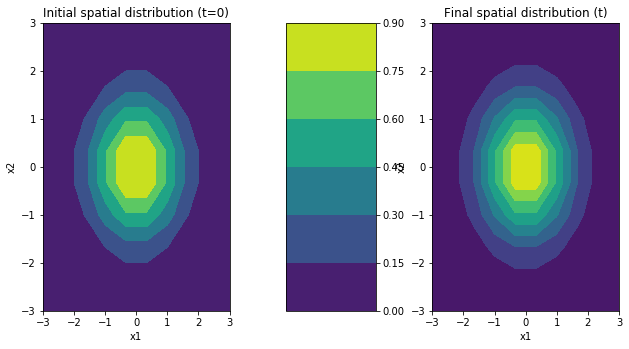

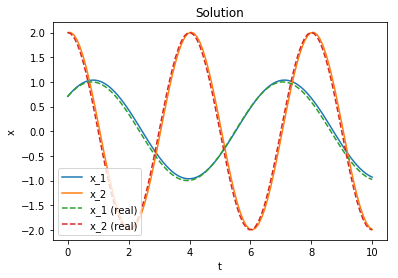

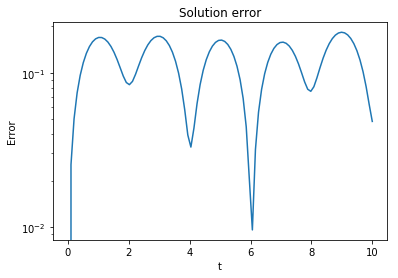

In [5]:
EQ.plot_r()
EQ.plot_x_vs_t()
EQ.plot_x_err_vs_t()

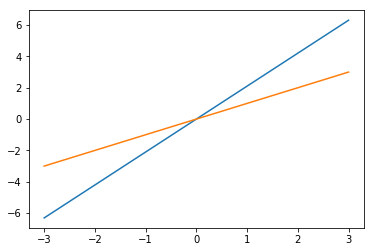

In [7]:
p = np.linspace(x_min, x_max, x_poi)
r = EQ.R[-1]
plt.plot(p, r)
plt.plot(p, EQ.r0)
plt.show()

---


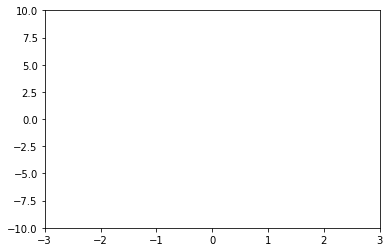

In [20]:
from matplotlib import animation, rc

plt.rcParams['animation.ffmpeg_path'] = './ffmpeg'

fig, ax = plt.subplots()
ax.set_xlim((x_min, x_max))
ax.set_ylim((-10., 10.))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    t = EQ.T[i]
    p = np.linspace(x_min, x_max, x_poi)
    r = EQ.R[i]
    if not t:
        t = 0.
        r = EQ.r0
    line.set_data(p, r)
    ax.set_title('Time %f'%t)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(EQ.T), interval=20, blit=True)
print('---')

In [21]:
from IPython.display import HTML
HTML(anim.to_html5_video())